# 量子コンピューター入門/量子ゲート

Kifumi Numata (Aug 17, 2023)

In [ ]:
# Qiskitライブラリーを導入
from qiskit import QuantumCircuit
from qiskit import Aer

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt

### 空の回路

1量子ビット回路から始めます。セルを選択して「Shift」＋「Enter」で実行できます。

In [ ]:
# １量子ビット回路を用意 
qc = QuantumCircuit(1)

qc.draw(output="mpl")    # 回路を描画

### Xゲート

In [ ]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

qc.draw(output="mpl")    # 回路を描画

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result)

### XゲートとHゲート

In [ ]:
qc = QuantumCircuit(2)    # 2量子ビット回路を用意

qc.x(0)
qc.h(1)

qc.draw(output="mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result)

### 1量子ビットゲートの書き方

    qc.x(0)    # X軸の周りのPi回転
    qc.y(0)    # Y軸の周りのPi回転
    qc.z(0)    # Z軸の周りのPi回転
    qc.s(0)    # Z軸の周りのPi/2回転
    qc.sdg(0)  # Z軸の周りの-Pi/2回転
    qc.h(0)    # Hゲート
    qc.rx(theta, 0)    # X軸の周りのtheta回転
    qc.ry(theta, 0)    # Y軸の周りのtheta回転
    qc.rz(theta, 0)    # Z軸の周りのtheta回転

### エンタングルメント

In [ ]:
# ２量子ビット回路を作成します。
qc = QuantumCircuit(2,2)    # 2量子ビット, 2古典ビットレジスター

# ゲートを適用します。
qc.h(0)
qc.cx(0,1)    # 制御NOTゲート

# 測定ゲートを追加
qc.measure(0,0)    # 量子ビットq0を測定して、古典レジスターc0に入れます
qc.measure(1,1)    # 量子ビットq1を測定して、古典レジスターc1に入れます

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# QASMシミュレーターで実験
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()

#  測定された回数を表示
counts = result.get_counts(qc)
print(counts)

# ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

In [ ]:
# アカウント情報をロードして、使える量子デバイスを確認します
from qiskit_ibm_provider import IBMProvider

# provider = IBMProvider(instance='ibm-q/open/main')  # Openプロバイダーの場合
provider = IBMProvider(instance='ibm-q-education/ibm-3/kawasaki-camp')

provider.backends()

In [ ]:
#一番空いているバックエンドを自動的に選択します
from qiskit_ibm_provider import least_busy

small_devices = provider.backends(simulator=False, operational=True, min_num_qubits=2)
real_backend = least_busy(small_devices)
print("最も空いているバックエンドは: ", real_backend.name)

In [ ]:
# 以下でデバイスを直接指定することもできます。
real_backend = provider.get_backend('ibmq_quito')   # 例）ibmq_quitoを使う場合

In [ ]:
# 実機のバックエンドでの実行に最適な回路に変換します
from qiskit import transpile
t_qc = transpile(qc, real_backend)
job = real_backend.run(t_qc)    # 上記のバックエンドで実行します

job_id = job.job_id() # 実行に時間がかかるのでjob_idを表示します
print(job_id)

上に表示されたjob_idを下のセルに上書きします。

In [ ]:
job_default = provider.backend.retrieve_job('cjbjk0enq2dtf2169fc0') # job_idの例です
job_default.status() # ジョブの実行状態を確認します

上記のセルを何回か実行して、 `job has successfully run` と出てきたら、実機での実行が終わっているので、以下のセルを実行して結果を確認します。

In [ ]:
# 結果を確認します
exp_result = job_default.result()
exp_counts = exp_result.get_counts()
print(exp_counts)
plot_histogram(exp_counts)

実機での実行を待つ間に、演習に取り組んでみましょう。
## 演習

次の回路を作って量子シミュレーターで実行してみましょう。

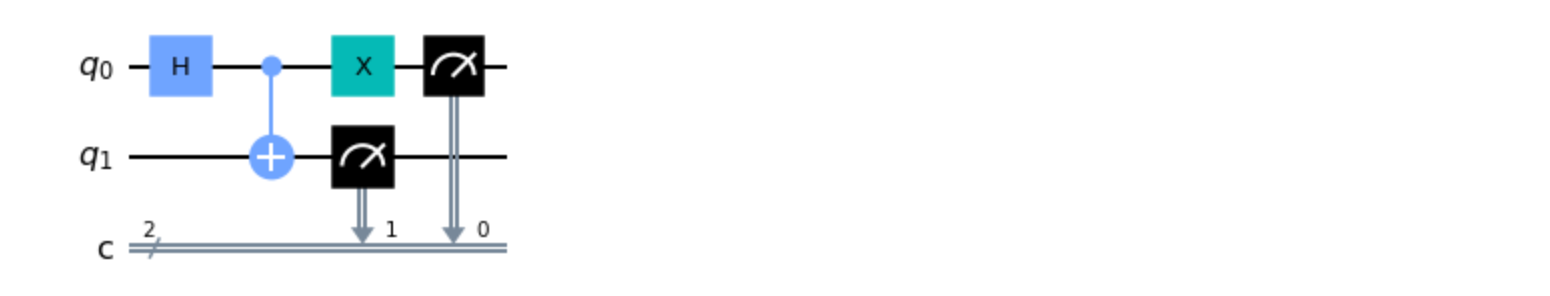

In [ ]:
# ２量子ビット回路を古典ビット含めて作成します。


# ゲートを適用します。


# 測定ゲートを追加


# 回路を描画


In [ ]:
# QASMシミュレーターで実験


#  測定された回数を表示


# ヒストグラムで測定された確率をプロット


In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table